PURE Project: Stigmatization in the Workplace: Impact on Women's Careers

Hi there, welcome! This is my first ever data analysis project for PURE Project named "Stigmatization in the Workplace: Impact of Women's Career". In this project, I collected data form 28 different surveys around the world that are about the impact of menopause on working women.

The dataset includes the number of particpants in the survey, links for surveys, the ratios of resposes to spesific questions such as whether they had any formal support for Menopause in their workplace or not etc.

Here is the link for the project website: https://pure.sabanciuniv.edu/project/10306/stigmatisation-workplace-impact-women-s-careers

In [154]:
# Import necessary libraries
import pandas as pd
import numpy as np

import warnings as wr
wr.filterwarnings("ignore")

In [156]:
df = pd.read_excel("Pure_survey_dataset.xlsx")
df

,Link for Surveys,# of women,Menopause Neg. İmpact on Worklife (Ratio),Considered leaving JOB (Ratio),no formal support or policy for Menopause in workplace (Ratio),Gave up work due to Menopause and lack of support (Ratio),Organization/ Website
0,https://www.cipd.org/globalassets/media/knowle...,1593,0.670,NaN,NaN,NaN,CIPD
1,https://www.forthwithlife.co.uk/blog/uk-menopa...,2005,0.630,NaN,0.900,NaN,Forth
2,https://committees.parliament.uk/publications/...,2161,NaN,NaN,0.590,NaN,UK Parliament
3,https://www.ucd.ie/equality/t4media/Menopause%...,1152,0.820,0.400,NaN,0.120,UCD
4,https://fortune.com/well/article/menopause-sti...,2000,0.490,NaN,0.760,NaN,Fortune
5,https://www.kornferry.com/content/dam/kornferr...,8000,0.470,0.150,NaN,0.130,Korn Ferry
6,https://content.get-carrot.com/rs/418-PQJ-171/...,2000,0.800,NaN,NaN,0.255,Carrot
7,https://www.theguardian.com/society/2023/dec/1...,11000,0.750,NaN,0.830,NaN,The Guardian
8,https://www.themenopausehub.ie/menopause-blog/...,3000,0.840,0.333,NaN,0.070,the menopause hub
9,https://www.irishexaminer.com/news/arid-412182...,1087,0.840,0.400,NaN,NaN,Irish Examiner


In [158]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Link for Surveys                                                30 non-null     object 
 1   # of women                                                      30 non-null     int64  
 2   Menopause Neg. İmpact on Worklife (Ratio)                       27 non-null     float64
 3   Considered leaving JOB (Ratio)                                  5 non-null      float64
 4   no formal support or policy for Menopause in workplace (Ratio)  11 non-null     float64
 5   Gave up work due to Menopause and lack of support (Ratio)       9 non-null      float64
 6   Organization/ Website                                           30 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ KB

As you can see, there are lots of missing values in this dataset since different questions are asked in different surveys in general. We will try to come up with different methods to fill the missing values.

In [253]:
Total_participants = df["# of women"].sum()
Total_participants

61879

In total over 60000 women was included in this 28 different surveys

In [160]:
df = df.rename(columns = {"Menopause Neg. İmpact on Worklife (Ratio)":"Neg. Impact", 
                          "Considered leaving JOB (Ratio)":"Consider Leaving", 
                          "no formal support or policy for Menopause in workplace (Ratio)":"No Support",
                          "Gave up work due to Menopause and lack of support (Ratio)":"Left the Job"
                         })

Renamed the long column names so that the manipulation of the dataset can be easier.

In [162]:
corr_matrix = df.select_dtypes(include=["number"]).corr()
print(corr_matrix)

                  # of women  Neg. Impact  Consider Leaving  No Support  \
# of women          1.000000     0.205810         -0.653846    0.171995   
Neg. Impact         0.205810     1.000000          0.955374   -0.035628   
Consider Leaving   -0.653846     0.955374          1.000000         NaN   
No Support          0.171995    -0.035628               NaN    1.000000   
Left the Job        0.301519     0.568345          0.075488   -0.998815   

                  Left the Job  
# of women            0.301519  
Neg. Impact           0.568345  
Consider Leaving      0.075488  
No Support           -0.998815  
Left the Job          1.000000  


We tried to see the correlation between the numeric values but the missing values make it really hard.

<Axes: >

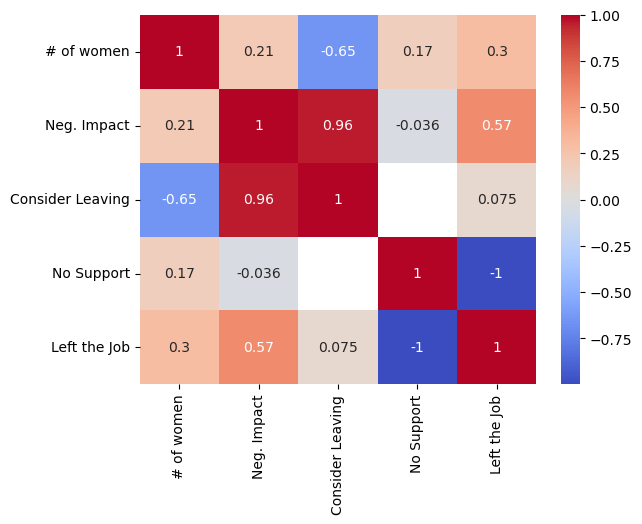

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
# import these libraries for visualizations
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")

In [166]:
df = df.drop(columns = ["Link for Surveys"], axis = 1)

In [168]:
df = df.rename(columns = {"Organization/ Website":"Org/Website"})
df.head()

,# of women,Neg. Impact,Consider Leaving,No Support,Left the Job,Org/Website
0,1593,0.67,NaN,NaN,NaN,CIPD
1,2005,0.63,NaN,0.90,NaN,Forth
2,2161,NaN,NaN,0.59,NaN,UK Parliament
3,1152,0.82,0.4,NaN,0.12,UCD
4,2000,0.49,NaN,0.76,NaN,Fortune


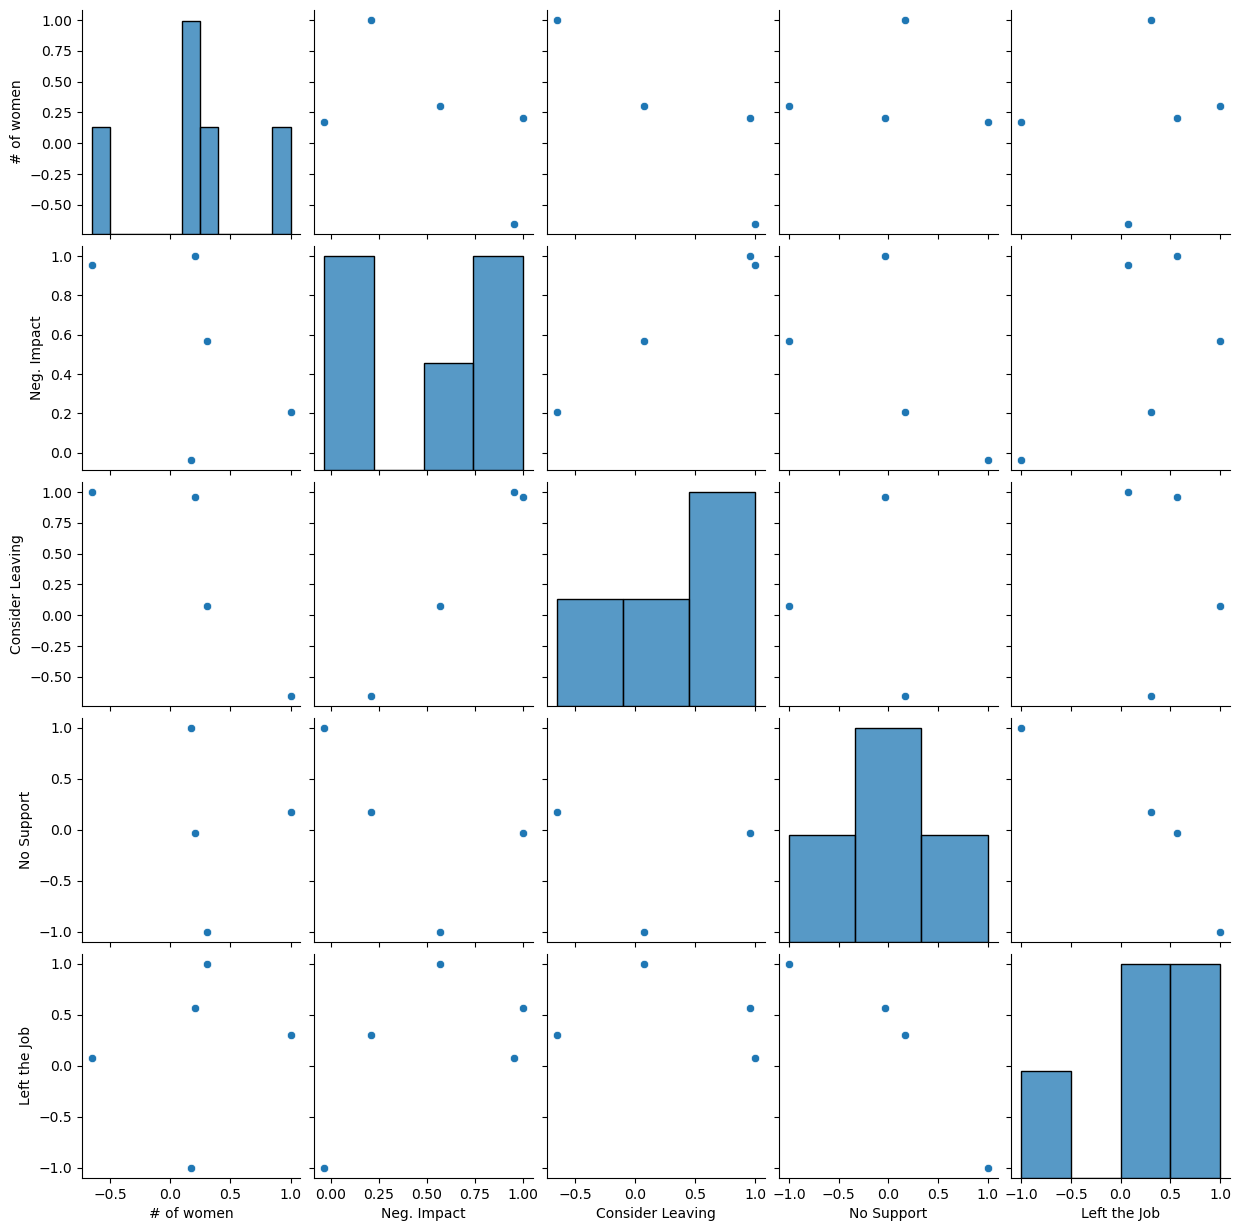

In [170]:
sns.pairplot(corr_matrix) # A more advanced graph but there are lost of missing values!

Used functions to fill the missing values with different methods such as Mean, Median and Mode. 

In [172]:
# For NaN values
Column_names = ["# of women",
                "Neg. Impact",
                "Consider Leaving",
                "No Support",
                "Left the Job"]

def Fill_NaN_Mean(df, Column_names):
    for i in range(len(Column_names)): 
        new_df = df.copy()
        new_df[Column_names[i]] = new_df[Column_names[i]].fillna(new_df[Column_names[i]].mean())
        
    return new_df

def Fill_NaN_Median(df, Column_names): 
    for i in range(len(Column_names)):  
        new_df_2 = df.copy()
        new_df_2[Column_names[i]] = new_df_2[Column_names[i]].fillna(new_df_2[Column_names[i]].median())
        
    return new_df_2

def Fill_NaN_Mode(df, Column_names):
    for i in range(len(Column_names)):  
        new_df_3 = df.copy()
        new_df_3[Column_names[i]] = new_df_3[Column_names[i]].fillna(new_df_3[Column_names[i]].mode())
        
    return new_df_3

Used another fucntion for plotting correlation matrix in the new dataset which has filled with previous methods.

In [174]:
cmap_list = ["plasma","inferno","cividis","magma", "Spectral"]
import random

def plot_corr_matrix(df,cmap_list):
    cmap = random.choice(cmap_list)
    sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot = True, cmap = cmap)

In [176]:
A = Fill_NaN_Mean(df,Column_names)
A.head(10)

,# of women,Neg. Impact,Consider Leaving,No Support,Left the Job,Org/Website
0,1593,0.67,NaN,NaN,0.148333,CIPD
1,2005,0.63,NaN,0.90,0.148333,Forth
2,2161,NaN,NaN,0.59,0.148333,UK Parliament
3,1152,0.82,0.400,NaN,0.120000,UCD
4,2000,0.49,NaN,0.76,0.148333,Fortune
5,8000,0.47,0.150,NaN,0.130000,Korn Ferry
6,2000,0.80,NaN,NaN,0.255000,Carrot
7,11000,0.75,NaN,0.83,0.148333,The Guardian
8,3000,0.84,0.333,NaN,0.070000,the menopause hub
9,1087,0.84,0.400,NaN,0.148333,Irish Examiner


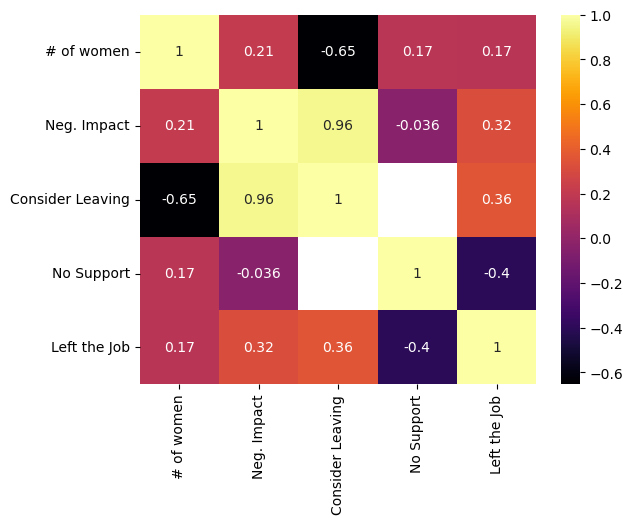

In [178]:
mean_df = plot_corr_matrix(Fill_NaN_Mean(df,Column_names),cmap_list)

In [185]:
B = Fill_NaN_Median(df,Column_names)
B.head(10)

,# of women,Neg. Impact,Consider Leaving,No Support,Left the Job,Org/Website
0,1593,0.67,NaN,NaN,0.100,CIPD
1,2005,0.63,NaN,0.90,0.100,Forth
2,2161,NaN,NaN,0.59,0.100,UK Parliament
3,1152,0.82,0.400,NaN,0.120,UCD
4,2000,0.49,NaN,0.76,0.100,Fortune
5,8000,0.47,0.150,NaN,0.130,Korn Ferry
6,2000,0.80,NaN,NaN,0.255,Carrot
7,11000,0.75,NaN,0.83,0.100,The Guardian
8,3000,0.84,0.333,NaN,0.070,the menopause hub
9,1087,0.84,0.400,NaN,0.100,Irish Examiner


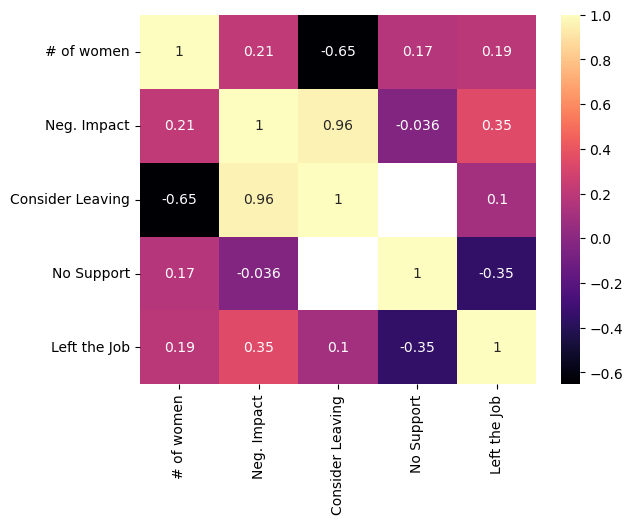

In [187]:
median_df = plot_corr_matrix(Fill_NaN_Median(df,Column_names),cmap_list)

In [191]:
C = Fill_NaN_Mode(df,Column_names)
C.head(10)

,# of women,Neg. Impact,Consider Leaving,No Support,Left the Job,Org/Website
0,1593,0.67,NaN,NaN,0.020,CIPD
1,2005,0.63,NaN,0.90,0.060,Forth
2,2161,NaN,NaN,0.59,0.070,UK Parliament
3,1152,0.82,0.400,NaN,0.120,UCD
4,2000,0.49,NaN,0.76,0.100,Fortune
5,8000,0.47,0.150,NaN,0.130,Korn Ferry
6,2000,0.80,NaN,NaN,0.255,Carrot
7,11000,0.75,NaN,0.83,0.255,The Guardian
8,3000,0.84,0.333,NaN,0.070,the menopause hub
9,1087,0.84,0.400,NaN,NaN,Irish Examiner


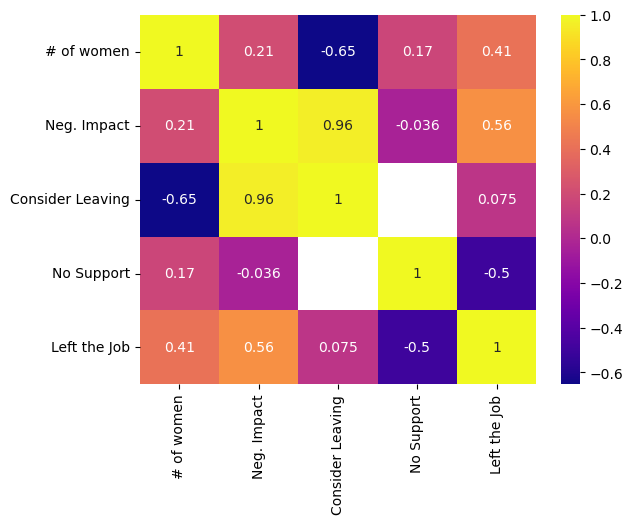

In [189]:
mode_df = plot_corr_matrix(Fill_NaN_Mode(df,Column_names),cmap_list)

To visualize better, added new columns to original dataframe using functions, calculating the number of women that responded spesific questions.

In [199]:
New_column_names = ["# of W had Neg Impacts", 
                    "# of W Consider Leaving",
                    "# of W Not Supported",
                    "# of W Left Their Job"]

def newColumns(df1, Column_names, New_column_names):
    for k in range(len(New_column_names)):
        df1[New_column_names[k]] = df1[Column_names[0]] * df1[Column_names[k+1]]
        
    return df1

In [205]:
new_version_df = newColumns(df,Column_names, New_column_names)
new_version_df.head(10)

,# of women,Neg. Impact,Consider Leaving,No Support,Left the Job,Org/Website,# of W had Neg Impacts,# of W Consider Leaving,# of W Not Supported,# of W Left Their Job
0,1593,0.67,NaN,NaN,NaN,CIPD,1067.31,NaN,NaN,NaN
1,2005,0.63,NaN,0.90,NaN,Forth,1263.15,NaN,1804.50,NaN
2,2161,NaN,NaN,0.59,NaN,UK Parliament,NaN,NaN,1274.99,NaN
3,1152,0.82,0.400,NaN,0.120,UCD,944.64,460.8,NaN,138.24
4,2000,0.49,NaN,0.76,NaN,Fortune,980.00,NaN,1520.00,NaN
5,8000,0.47,0.150,NaN,0.130,Korn Ferry,3760.00,1200.0,NaN,1040.00
6,2000,0.80,NaN,NaN,0.255,Carrot,1600.00,NaN,NaN,510.00
7,11000,0.75,NaN,0.83,NaN,The Guardian,8250.00,NaN,9130.00,NaN
8,3000,0.84,0.333,NaN,0.070,the menopause hub,2520.00,999.0,NaN,210.00
9,1087,0.84,0.400,NaN,NaN,Irish Examiner,913.08,434.8,NaN,NaN


Used 3 functions:
First is for calculating the summary of the number of women who responded to a spesific question negatively, serving as evidence.
Second one is to calculate the total number of women who responded that question. 
Third one is for generating an average ratio by dividing the first and the second function's results.

In [221]:
sum_list = []
def Calculations(df1, sum_list):
    for m in range(len(New_column_names)):
        the_sum = df[New_column_names[m]].sum()
        sum_list.append(the_sum)
        
    return sum_list

total_num_list = []
def General_pop(df1, total_num_list, Column_names):
    for q in range(4):
        column_sum = 0
        for u in range(len(df1[Column_names[q+1]])):
            if pd.notna(df1[Column_names[q+1]][u]):
                column_sum += df1[Column_names[0]][u]
        total_num_list.append(column_sum)
                
    return total_num_list


ratio_list = []
def Ratio_generator(sum_list, total_num_list, ratio_list):
    for y in range(len(sum_list)):
        ratio_list.append(sum_list[y]/total_num_list[y])
        
    return ratio_list
        

In [223]:
D = Calculations(df, sum_list)
print(D)

[39354.633, 3354.87, 24109.932, 4085.0400000000004]


In [225]:
E = General_pop(df, total_num_list, Column_names)
print(E)

[57622, 14770, 30583, 21922]


In [229]:
General_ratios = Ratio_generator(Calculations(new_version_df, sum_list),
                                 General_pop(new_version_df, total_num_list, Column_names), 
                                 ratio_list)

In [233]:
print(General_ratios[:4])

[0.6829792961021832, 0.2271408259986459, 0.7883442435339895, 0.1863443116503969]


Now, we can visualize the average ratios for each category.

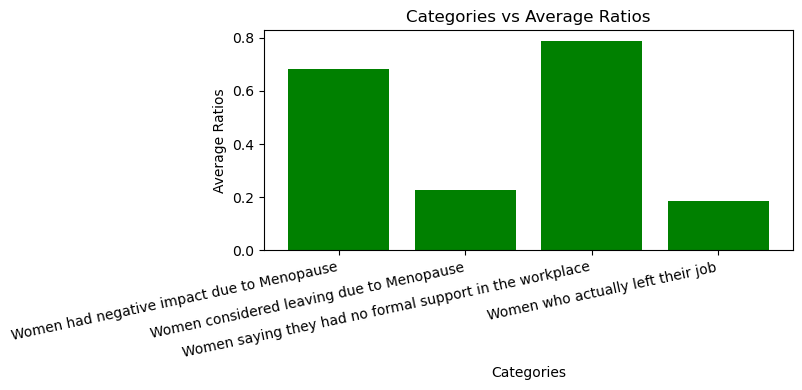

Results of Analysis:
1- Women stating that they had negative impact due to Menopause in their worklife is 68.30% on average.
2- Women considered leaving their job due to Menopause is 22.71% on average.
3- Women saying they had no formal support in the workplace is 78.83% on average.
4- Women who actually left their job due to their menopausal status is 18.63% on average.


In [293]:
y_values = General_ratios[:4]
x_values = ["Women had negative impact due to Menopause", 
            "Women considered leaving due to Menopause", 
            "Women saying they had no formal support in the workplace", 
            "Women who actually left their job"]  # Corresponding list of strings

# Create a bar chart
plt.figure(figsize=(8, 4))
plt.bar(x_values, y_values, color="green")
plt.xlabel("Categories")
plt.ylabel("Average Ratios")
plt.title("Categories vs Average Ratios")
plt.xticks(rotation=12, ha="right")
plt.tight_layout()
plt.show()

print("Results of Analysis:")
print("1- Women stating that they had negative impact due to Menopause in their worklife is ", format(y_values[0]*100, ".2f"),"% on average.", sep = "")
print("2- Women considered leaving their job due to Menopause is ", format(y_values[1]*100, ".2f"),"% on average.", sep = "")
print("3- Women saying they had no formal support in the workplace is ", format(y_values[2]*100, ".2f"),"% on average.", sep = "")
print("4- Women who actually left their job due to their menopausal status is " , format(y_values[3]*100, ".2f"),"% on average.", sep = "")

Used a function to generate new columns having the same unique values as average ratios, helping to make better visualizations.

In [303]:
Ratio_column_names = ["Ratio 1","Ratio 2","Ratio 3","Ratio 4"]

def Added_Ratios(df1, Ratio_column_names, General_ratios):
    for h in range(len(Ratio_column_names)):
        df1[Ratio_column_names[h]] = General_ratios[h]
    return df1

In [307]:
newest_df = new_version_df.copy()
newest_df = Added_Ratios(newest_df, Ratio_column_names, General_ratios)
newest_df.head()

,# of women,Neg. Impact,Consider Leaving,No Support,Left the Job,Org/Website,# of W had Neg Impacts,# of W Consider Leaving,# of W Not Supported,# of W Left Their Job,Ratio 1,Ratio 2,Ratio 3,Ratio 4
0,1593,0.67,NaN,NaN,NaN,CIPD,1067.31,NaN,NaN,NaN,0.682979,0.227141,0.788344,0.186344
1,2005,0.63,NaN,0.90,NaN,Forth,1263.15,NaN,1804.50,NaN,0.682979,0.227141,0.788344,0.186344
2,2161,NaN,NaN,0.59,NaN,UK Parliament,NaN,NaN,1274.99,NaN,0.682979,0.227141,0.788344,0.186344
3,1152,0.82,0.4,NaN,0.12,UCD,944.64,460.8,NaN,138.24,0.682979,0.227141,0.788344,0.186344
4,2000,0.49,NaN,0.76,NaN,Fortune,980.00,NaN,1520.00,NaN,0.682979,0.227141,0.788344,0.186344


In [313]:
newest_df = newest_df.sort_values(["# of women"]) # To get better visualizations
newest_df.head()

,# of women,Neg. Impact,Consider Leaving,No Support,Left the Job,Org/Website,# of W had Neg Impacts,# of W Consider Leaving,# of W Not Supported,# of W Left Their Job,Ratio 1,Ratio 2,Ratio 3,Ratio 4
16,351,0.777,NaN,NaN,NaN,The Journal of The Menopause Society,272.727,NaN,NaN,NaN,0.682979,0.227141,0.788344,0.186344
11,407,0.650,NaN,NaN,0.02,NLM,264.550,NaN,NaN,8.14,0.682979,0.227141,0.788344,0.186344
19,464,0.480,NaN,0.47,NaN,Workinmind,222.720,NaN,218.08,NaN,0.682979,0.227141,0.788344,0.186344
28,565,NaN,NaN,0.76,NaN,balance menopause,NaN,NaN,429.40,NaN,0.682979,0.227141,0.788344,0.186344
25,896,0.396,NaN,NaN,NaN,ScienceDirect,354.816,NaN,NaN,NaN,0.682979,0.227141,0.788344,0.186344


In [343]:
def Graphing(df1, column_names, Ratio_column_names, graph_names):
    for a in range(len(Ratio_column_names)):
        plt.figure(figsize = (12,6))
        plt.plot(df1[column_names[0]], df1[column_names[a+1]], marker='o', color='orange', linestyle='-', label = "Ratios from Surveys")
        plt.plot(df1[column_names[0]], df1[Ratio_column_names[a]], marker='o', color='pink', linestyle='-', label = "Average Ratio")
        plt.xlabel("Number of Participants (sorted)")
        plt.ylabel("Ratios")
        plt.legend(loc = "best")
        plt.title(graph_names[a])
        plt.show()

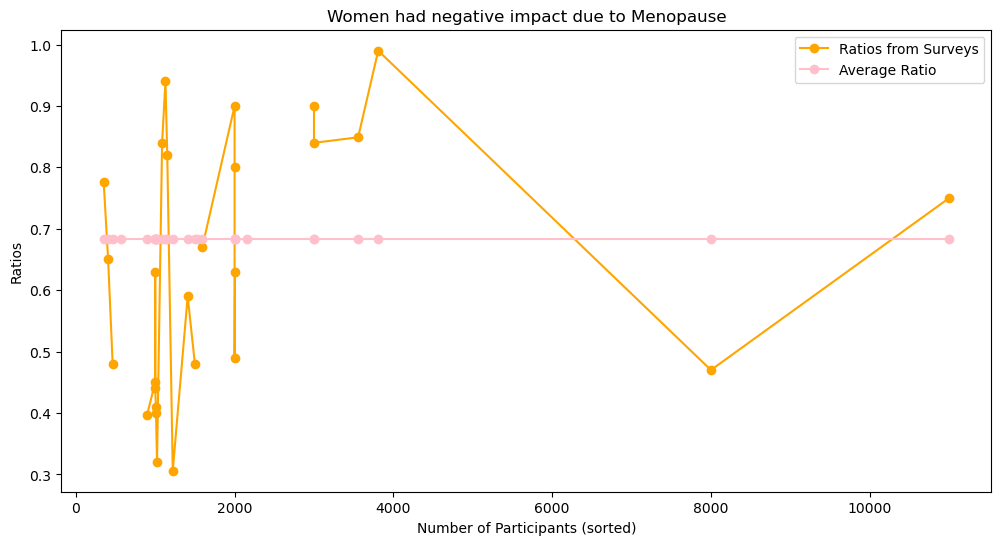

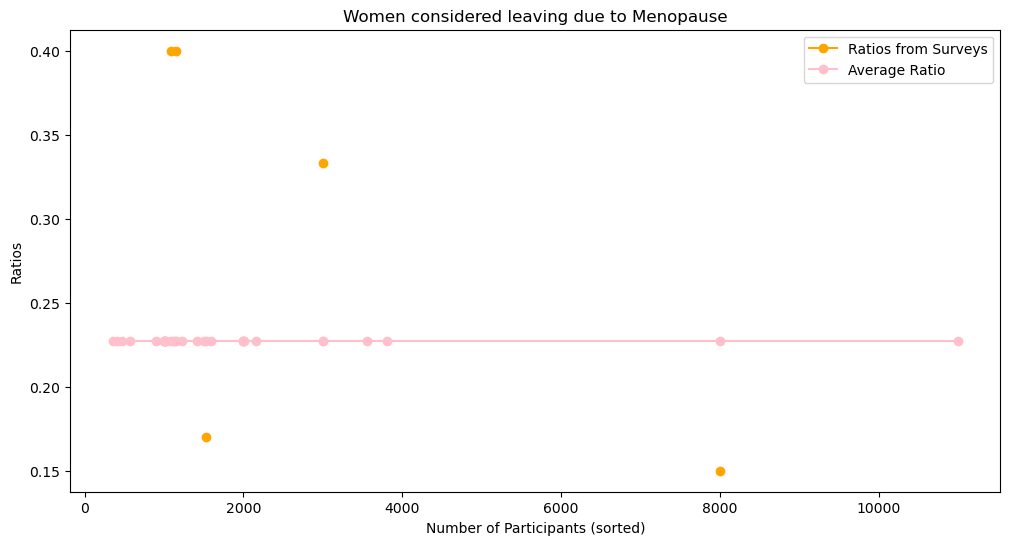

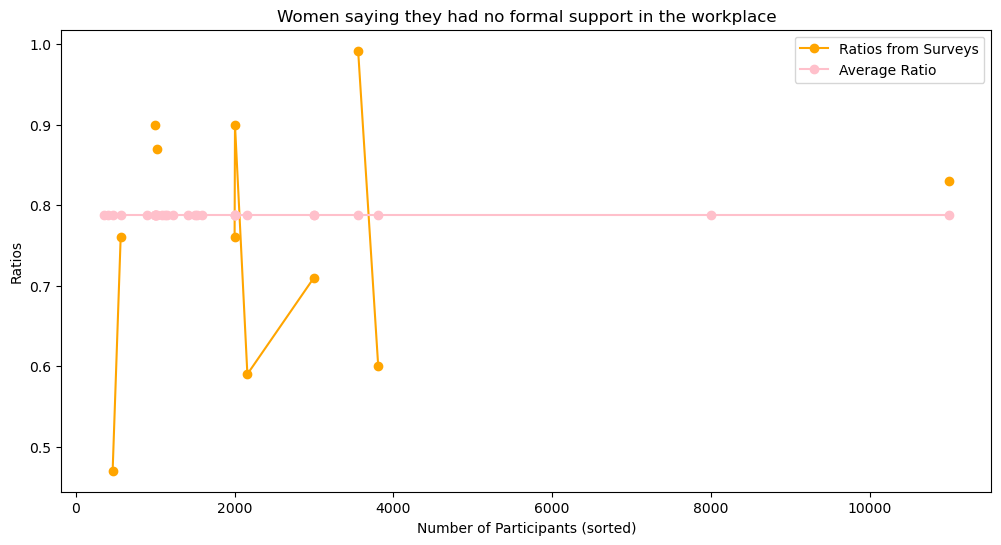

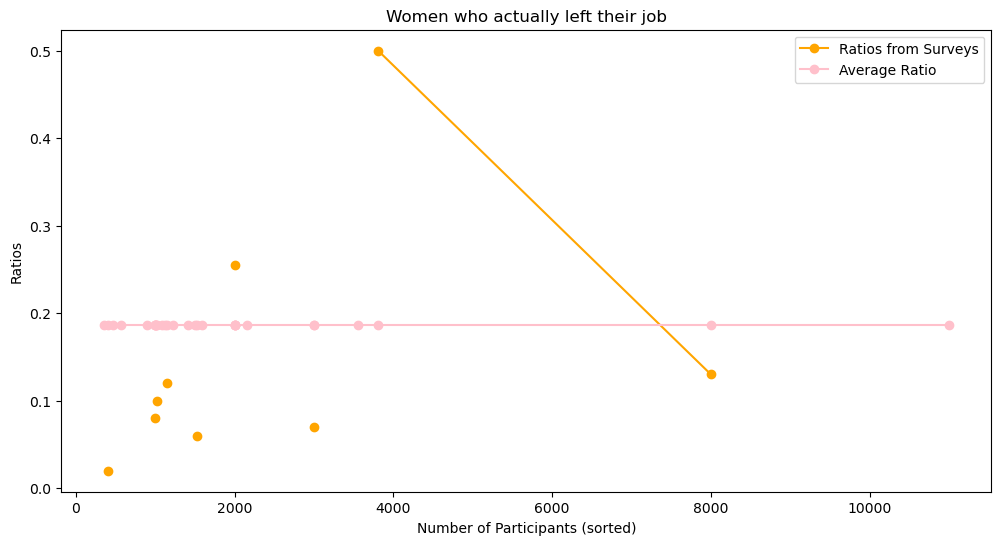

In [345]:
Graphing(newest_df, Column_names, Ratio_column_names, x_values)

In [ ]:
End of the project.